# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

Using the used car vehicles dataset, our goal is to predict data with a supervised regression model that will demonstrate how its features influcence the price of a used car. Price will be the dependent variable and other features such as make, model, year, mileage, condition, fuel type, and location will be dependent variables which will help to train our model.  The final result will provide insights in the influence of the different features on the price of the used car.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.


To gain a better understanding of the dataset, we will begin by conducting an exploratory data analysis. This includes using methods such as .info() to review data types and missing values, and .describe() to summarize statistical properties of numerical variables. We'll also inspect the distribution and range of key features through visualizations such as histograms, boxplots, and scatterplots.

During this process, we will identify:

* Potential data quality issues, such as missing values, outliers, or inconsistent formatting

* Irrelevant or low-variance features that may not contribute to the price prediction

* Correlations or relationships between independent variables and the target variable (price)

In [150]:
import numpy as np
import pandas as pd
from statsmodels.tsa import arima_process
import matplotlib.pyplot as plt
import warnings

#from statsmodels.datasets import nible
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf
warnings.filterwarnings("ignore")

In [151]:
#Column: price |  Null Percentage: 0.0 %
#Column: year |  Null Percentage: 0.28 %
#Column: manufacturer |  Null Percentage: 4.13 %
#Column: model |  Null Percentage: 1.24 %
#Column: condition |  Null Percentage: 40.79 %
#Column: cylinders |  Null Percentage: 41.62 %
#Column: fuel |  Null Percentage: 0.71 %
#Column: odometer |  Null Percentage: 1.03 %
#Column: title_status |  Null Percentage: 1.93 %
#Column: transmission |  Null Percentage: 0.6 %
#Column: VIN |  Null Percentage: 37.73 %
#Column: drive |  Null Percentage: 30.59 %
#Column: size |  Null Percentage: 71.77 %
#Column: type |  Null Percentage: 21.75 %
#Column: paint_color |  Null Percentage: 30.5 %
#Column: state |  Null Percentage: 0.0 %

In [152]:
vehicles_df = pd.read_csv('data/vehicles.csv')

vehicles_df.describe()

vehicles_df.info()
print ("==================================================")
for column in vehicles_df.columns:
    non_null_count = vehicles_df[column].count()
    total_count = len(vehicles_df)
    null_count = total_count - non_null_count
    null_percentage = round((null_count/total_count)*100,2)
    print(f"Column: {column} |  Null Percentage: {null_percentage} %")

vehicles_df['type'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

type
sedan          87056
SUV            77284
pickup         43510
truck          35279
other          22110
coupe          19204
hatchback      16598
wagon          10751
van             8548
convertible     7731
mini-van        4825
offroad          609
bus              517
Name: count, dtype: int64

In [153]:
vehicles_df['drive'].value_counts()

drive
4wd    131904
fwd    105517
rwd     58892
Name: count, dtype: int64

In [154]:
vehicles_df["model"].value_counts()

model
f-150                      8009
silverado 1500             5140
1500                       4211
camry                      3135
silverado                  3023
                           ... 
plymouth fury 1               1
f550 box truck delivery       1
duramax 2500hd                1
3 s sport                     1
Paige Glenbrook Touring       1
Name: count, Length: 29649, dtype: int64

<Axes: >

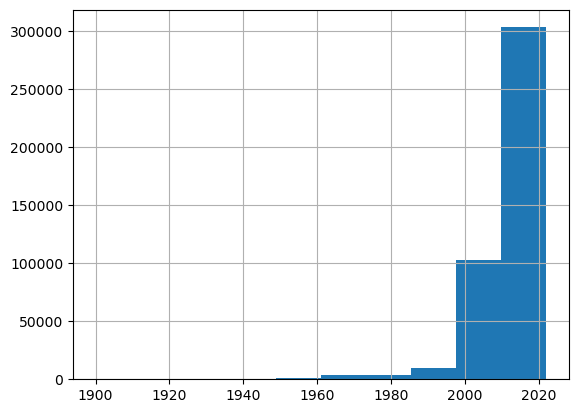

In [155]:
vehicles_df["year"].hist()

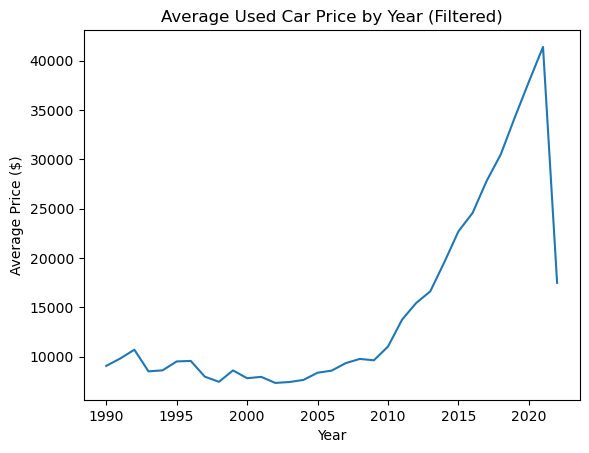

In [156]:
filtered_df = vehicles_df[(vehicles_df["price"] > 1000) & 
                          (vehicles_df["price"] < 100000) & 
                          (vehicles_df["year"] >= 1990) & 
                          (vehicles_df["year"] <= 2025)]

# Group and plot
filtered_df.groupby("year")["price"].mean().plot()
plt.xlabel("Year")
plt.ylabel("Average Price ($)")
plt.title("Average Used Car Price by Year (Filtered)")
plt.show()

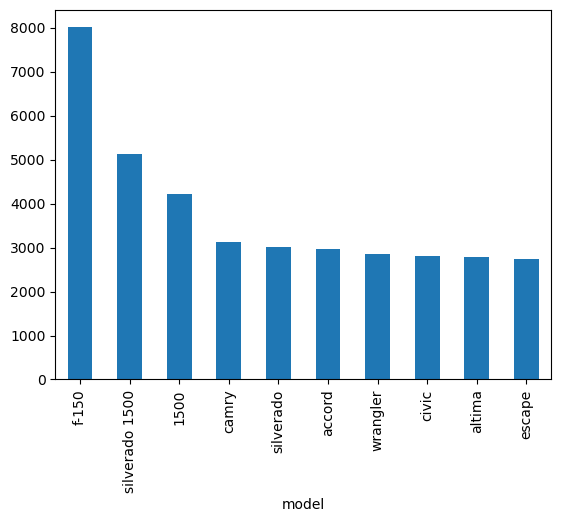

In [157]:
vehicles_df["model"].value_counts().nlargest(10).plot(kind='bar')

plt.show()

In [158]:
#vehicles_df[vehicles_df["odometer"] > 10]['odometer'].value_counts()
vehicles_df[vehicles_df["odometer"] > 10]['odometer'].value_counts().sort_values()

odometer
26892.0        1
121377.0       1
175859.0       1
92493.0        1
157748.0       1
            ... 
140000.0    1244
160000.0    1250
150000.0    1603
200000.0    1728
100000.0    2263
Name: count, Length: 104859, dtype: int64

### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [160]:
#vehicles_df.drop(columns=["id", "VIN", "regionf"])
print(vehicles_df.columns)
vehicles_df.head()

Index(['id', 'region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'VIN',
       'drive', 'size', 'type', 'paint_color', 'state'],
      dtype='object')


,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [161]:
#pip install category_encoders 

In [162]:
from category_encoders import JamesSteinEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, TransformedTargetRegressor
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import ElasticNet

In [163]:


vehicles_df.head(10)

#Fill NaN with mode
print ("Fuel Mode : " + str(vehicles_df['fuel'].mode()[0]))
print (vehicles_df['fuel'].value_counts())
vehicles_df['fuel']=vehicles_df['fuel'].fillna(vehicles_df['fuel'].mode()[0])
vehicles_df['title_status']=vehicles_df['title_status'].fillna(vehicles_df['title_status'].mode()[0])
vehicles_df['transmission']=vehicles_df['transmission'].fillna(vehicles_df['transmission'].mode()[0])
vehicles_df['drive']=vehicles_df['drive'].fillna(vehicles_df['drive'].mode()[0])
vehicles_df['paint_color'] = vehicles_df['paint_color'].fillna(vehicles_df['paint_color'].mode()[0])
vehicles_df['condition'] = vehicles_df['condition'].fillna(vehicles_df['condition'].mode()[0])
vehicles_df['type']= vehicles_df['type'].fillna(vehicles_df['type'].mode()[0]) #should maybe drop
vehicles_df['fuel'].unique()
vehicles_df['fuel'].isna().sum()


#fill NaN with median].median()[0]) #should maybe drop

vehicles_df['odometer'] = vehicles_df['odometer'].fillna(vehicles_df['odometer'].median())
vehicles_df['year']= vehicles_df['year'].fillna(vehicles_df['year'].median())
#one hot WIP
#one_hot = OneHotEncoder()


vehicles_df.head()

Fuel Mode : gas
fuel
gas         356209
other        30728
diesel       30062
hybrid        5170
electric      1698
Name: count, dtype: int64


,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,2013.0,NaN,NaN,good,NaN,gas,85548.0,clean,automatic,NaN,4wd,NaN,sedan,white,az
1,7218891961,fayetteville,11900,2013.0,NaN,NaN,good,NaN,gas,85548.0,clean,automatic,NaN,4wd,NaN,sedan,white,ar
2,7221797935,florida keys,21000,2013.0,NaN,NaN,good,NaN,gas,85548.0,clean,automatic,NaN,4wd,NaN,sedan,white,fl
3,7222270760,worcester / central MA,1500,2013.0,NaN,NaN,good,NaN,gas,85548.0,clean,automatic,NaN,4wd,NaN,sedan,white,ma
4,7210384030,greensboro,4900,2013.0,NaN,NaN,good,NaN,gas,85548.0,clean,automatic,NaN,4wd,NaN,sedan,white,nc


In [164]:
vehicles_df.head()
#vehicles_df['title_status'].unique()

vehicles_df = pd.get_dummies(vehicles_df, columns=['title_status'], prefix='title_status')
vehicles_df = pd.get_dummies(vehicles_df, columns=['transmission'], prefix='transmission')
vehicles_df = pd.get_dummies(vehicles_df, columns=['drive'], prefix='drive')




vehicles_df = vehicles_df[
    (vehicles_df['price'] >= 500) & 
    (vehicles_df['price'] <= 50_000)
]

vehicles_df = vehicles_df[(vehicles_df['odometer'] > 1000) & (vehicles_df['odometer'] < 180000)]
vehicles_df = vehicles_df[vehicles_df['odometer'] > 0] #already taken care of above

vehicles_df = vehicles_df[vehicles_df['year'] > 1980] #already taken care of above

vehicles_df.head()

columns_to_encode = ['fuel', 'paint_color', 'type', 'condition', 'state', 'model', 'manufacturer'] #,

# Fill missing values first (you can do this in a pipeline too)
for col in columns_to_encode:
    vehicles_df[col] = vehicles_df[col].fillna('unknown')

# Fit and transform
js_encoder = JamesSteinEncoder(cols=columns_to_encode)
encoded_df = js_encoder.fit_transform(vehicles_df[columns_to_encode], vehicles_df['price'])

# Combine with rest of data
#vehicles_df = vehicles_df.drop(columns = ['region','cylinders','size','id','VIN'])
vehicles_df = vehicles_df.drop(columns = ['region','cylinders','size','id','VIN']) #try dropping model
vehicles_encoded = vehicles_df.drop(columns=columns_to_encode).join(encoded_df)





# Step 1: Compute average price by year
avg_price_per_year = vehicles_encoded.groupby('year')['price'].mean().rename('avg_price_for_year')

# Step 2: Merge into main DataFrame
vehicles_encoded = vehicles_encoded.merge(avg_price_per_year, on='year', how='left')

current_year = vehicles_encoded['year'].max()
# Calculate age, but set a minimum of 1 year to avoid division by zero
vehicle_age = (current_year - vehicles_encoded['year']).clip(lower=1)

# Now compute miles_per_year safely
vehicles_encoded['miles_per_year'] = vehicles_encoded['odometer'] / vehicle_age

In [165]:
vehicles_encoded['year'].describe()
vehicles_encoded['year'].value_counts()

vehicles_df[vehicles_df['odometer'] == 0]['condition'].value_counts()

Series([], Name: count, dtype: int64)

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [167]:
#vehicles_encoded.head()
#vehicles_encoded.info()
#vehicles_encoded.info()
#vehicles_encoded['price'].describe()
vehicles_df['price'].describe()

count    320300.000000
mean      18840.186747
std       11905.741631
min         500.000000
25%        8799.000000
50%       16650.000000
75%       27892.250000
max       50000.000000
Name: price, dtype: float64

In [168]:
X=vehicles_encoded.drop(columns=['price'])
y=vehicles_encoded['price']

X_train, X_test, y_train, y_test = train_test_split(X, y) #default 25% split
X_train_clean = X_train.astype(float)
X_test_clean = X_test.astype(float)

X_train_clean.head()

,year,odometer,title_status_clean,title_status_lien,title_status_missing,title_status_parts only,title_status_rebuilt,title_status_salvage,transmission_automatic,transmission_manual,...,drive_rwd,fuel,paint_color,type,condition,state,model,manufacturer,avg_price_for_year,miles_per_year
220093,2012.0,120747.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,17885.541977,19135.321905,16521.600132,19996.600667,17704.983642,10733.521244,14019.716519,15088.783116,12074.700000
88408,2014.0,117677.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,17885.541977,19141.133187,16521.600132,19996.600667,18502.104303,10541.351803,15495.338570,18952.257264,14709.625000
261958,2011.0,142000.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,17885.541977,19135.321905,16521.600132,19996.600667,20242.643946,7861.601922,19567.405366,13692.959079,12909.090909
148211,2018.0,10000.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,17885.541977,19135.321905,18601.168623,17922.187736,17701.746531,15992.031616,19873.394603,28274.676159,2500.000000
111781,2017.0,118103.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,17885.541977,19135.321905,12951.046810,16014.434392,18499.094545,20708.672317,13682.349653,25517.066694,23620.600000


In [169]:

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('lori_transformer', PolynomialFeatures(degree=2)),
    ('lori_regression', LinearRegression())
])

pipe.fit(X_train_clean, y_train)
train_mse = mean_squared_error(y_train, pipe.predict(X_train_clean))
test_mse = mean_squared_error(y_test, pipe.predict(X_test_clean))
print (train_mse)
print (test_mse)
train_rmse = np.sqrt(mean_squared_error(y_train, pipe.predict(X_train_clean)))
test_rmse = np.sqrt(mean_squared_error(y_test, pipe.predict(X_test)))

print("Train RMSE: $", round(train_rmse,2))
print("Test RMSE: $", round(test_rmse,2))
print ("######################################### #########################################")



model_ridge = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('ridge', Ridge(alpha=1))
])

#model_ridge.get_params()
#param_grid = {
#    'ridge__alpha': [.1,1,5],
#    'ridge__copy_X': [True, False],
#    'ridge__fit_intercept': [True, False],
#    'ridge__positive': [True, False]
#}

# RidgeCV
ridge_cv = RidgeCV(alphas=[0.01, 0.1, 1, 10, 100], scoring='neg_root_mean_squared_error', cv=5)
ridge_cv.fit(X_train, y_train)

print("Best alpha:", ridge_cv.alpha_)


model_ridge.fit(X_train_clean, y_train)
predictions = model_ridge.predict(X_test)
train_mse = mean_squared_error(y_train, model_ridge.predict(X_train_clean))
test_mse = mean_squared_error(y_test, model_ridge.predict(X_test_clean))
print (train_mse)
print (test_mse)
train_rmse = np.sqrt(mean_squared_error(y_train, model_ridge.predict(X_train_clean)))
test_rmse = np.sqrt(mean_squared_error(y_test, model_ridge.predict(X_test)))

print("Train RMSE: $", round(train_rmse,2))
print("Test RMSE: $", round(test_rmse,2))
print ("######################################### #########################################")

scores = cross_val_score(model_ridge, X, y, cv=5, scoring='neg_root_mean_squared_error')
print("Cross-validated RMSE:", -scores.mean())

result = permutation_importance(model_ridge, X_test_clean, y_test, n_repeats=10, random_state=42)

importances = pd.Series(result.importances_mean, index=X_test.columns)
print(importances.sort_values(ascending=False).head(10))

# Define Lasso model pipeline
lasso_model = Pipeline([
    ('scaler', StandardScaler()),            # Always good before regularization
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('lasso', Lasso(alpha=1.0))              # Alpha controls regularization strength change to elastic
    #('elasticnet', ElasticNet(alpha=1.0, l1_ratio=0.5))
#  from sklearn.linear_model import ElasticNet
#('elasticnet', ElasticNet(alpha=1.0, l1_ratio=0.5))  
])

lasso_model.fit(X_train_clean, y_train)
predictions = lasso_model.predict(X_test)
train_mse = mean_squared_error(y_train, lasso_model.predict(X_train_clean))
test_mse = mean_squared_error(y_test, lasso_model.predict(X_test_clean))
print (train_mse)
print (test_mse)
train_rmse = np.sqrt(mean_squared_error(y_train, lasso_model.predict(X_train_clean)))
test_rmse = np.sqrt(mean_squared_error(y_test, lasso_model.predict(X_test)))

print("Train RMSE: $", round(train_rmse,2))
print("Test RMSE: $", round(test_rmse,2))
print ("######################################### #########################################")


26893430.308352675
26513688.33045622
Train RMSE: $ 5185.89
Test RMSE: $ 5149.14
######################################### #########################################
Best alpha: 0.1
26894234.16228466
26516350.695234198
Train RMSE: $ 5185.97
Test RMSE: $ 5149.4
######################################### #########################################
Cross-validated RMSE: 5209.47041316903
odometer                  0.995245
miles_per_year            0.691095
year                      0.587496
model                     0.562656
avg_price_for_year        0.214018
fuel                      0.028995
type                      0.019809
transmission_other        0.015234
manufacturer              0.008033
transmission_automatic    0.007994
dtype: float64
26898100.36107987
26522297.633117728
Train RMSE: $ 5186.34
Test RMSE: $ 5149.98
######################################### #########################################


In [170]:
top_features = ['odometer', 'year','miles_per_year', 'avg_price_for_year','fuel', 'model','manufacturer']

#top_features = ['miles_per_year', 'fuel', 'model']

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), top_features)
])

simple_model = Pipeline([
    ('preprocessor', preprocessor),
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('reg', Ridge(alpha=1))  # or LinearRegression()
])

simple_model.fit(X_train_clean[top_features], y_train)


#predictions = model_ridge.predict(X_test)
train_mse = mean_squared_error(y_train, simple_model.predict(X_train_clean))
test_mse = mean_squared_error(y_test, simple_model.predict(X_test_clean))
print (train_mse)
print (test_mse)
train_rmse = np.sqrt(mean_squared_error(y_train, simple_model.predict(X_train_clean)))
test_rmse = np.sqrt(mean_squared_error(y_test, simple_model.predict(X_test)))

print("Train RMSE: $", round(train_rmse,2))
print("Test RMSE: $", round(test_rmse,2))
print ("######################################### #########################################")

31530981.950982578
31159683.685696147
Train RMSE: $ 5615.25
Test RMSE: $ 5582.09
######################################### #########################################


In [171]:
dummy = DummyRegressor(strategy="mean")
dummy.fit(X_train, y_train)
dummy_preds = dummy.predict(X_test_clean)

baseline_rmse = np.sqrt(mean_squared_error(y_test, dummy_preds))
print(f"Baseline RMSE: {baseline_rmse:.2f}")

Baseline RMSE: 11882.19


In [172]:
#Using Grid Search to find the best parameters

model_ridge.get_params()
#pipe.get_parms()
params = {
    'ridge__alpha': [0.1, 1, 10],
#    'poly__degree': [1, 2, 3] #Can me memory intensive for poly 3
}

grid = GridSearchCV(model_ridge, params, scoring='neg_root_mean_squared_error', cv=5)
grid.fit(X_train_clean, y_train)
print(grid.best_params_)

#result {'poly__degree': 2, 'ridge__alpha': 10} #sometimes the answer was 1, sometimes 10

{'ridge__alpha': 1}


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [174]:
# Combine predictions and true values

train_preds = model_ridge.predict(X_train_clean)
test_preds = model_ridge.predict(X_test)

df_preds = pd.DataFrame({
    'Actual': vehicles_encoded["price"],
    'Predicted': pd.concat([pd.Series(train_preds, index=y_train.index),
                            pd.Series(test_preds, index=y_test.index)]),
    'Dataset': ['Train'] * len(y_train) + ['Test'] * len(y_test)
})




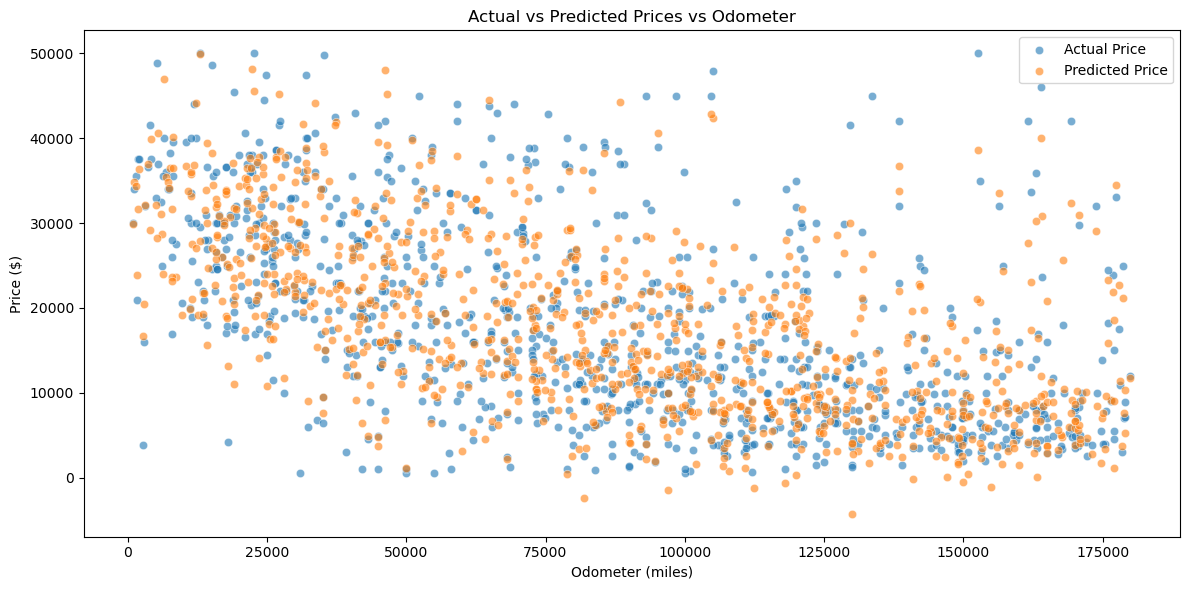

In [175]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plot_df = pd.DataFrame({
    'Actual Price': pd.concat([y_train, y_test]),
    'Predicted Price': pd.concat([pd.Series(train_preds, index=y_train.index),
                                  pd.Series(test_preds, index=y_test.index)]),
    'Odometer': pd.concat([X_train_clean['odometer'], X_test['odometer']]),
    'Year':pd.concat([X_train_clean['year'], X_test['year']])
}).sample(1000, random_state=42)

# Plot
plt.figure(figsize=(12, 6))
sns.scatterplot(data=plot_df, x='Odometer', y='Actual Price', label='Actual Price', alpha=0.6)
sns.scatterplot(data=plot_df, x='Odometer', y='Predicted Price', label='Predicted Price', alpha=0.6)
plt.title('Actual vs Predicted Prices vs Odometer')
plt.xlabel('Odometer (miles)')
plt.ylabel('Price ($)')
plt.legend()
plt.tight_layout()
plt.show()

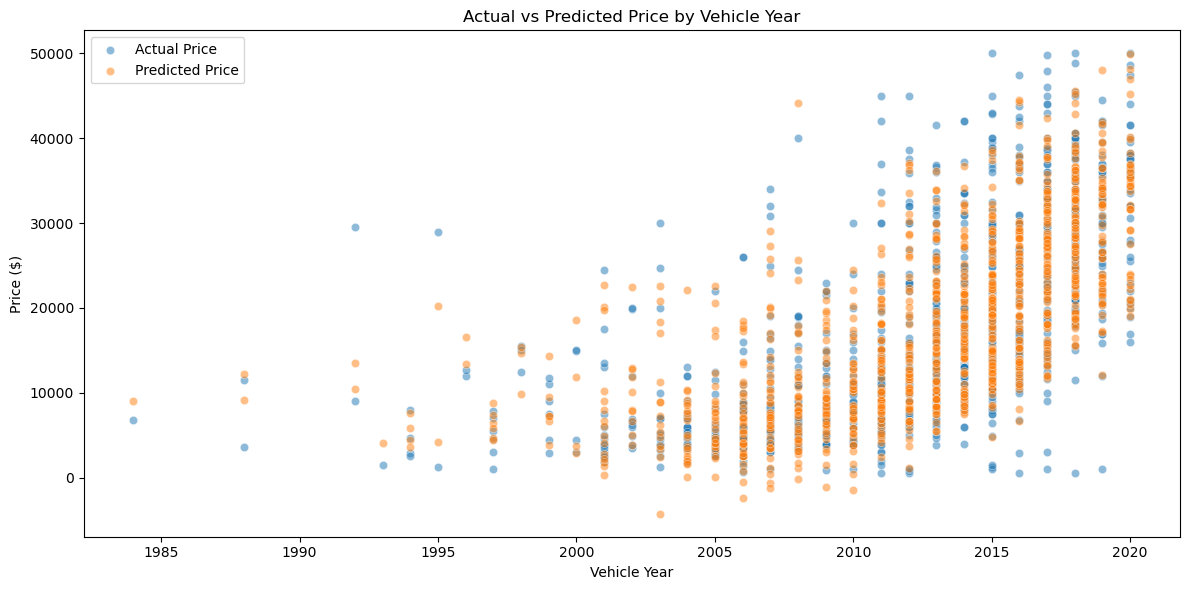

<Figure size 640x480 with 0 Axes>

In [176]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=plot_df, x='Year', y='Actual Price', label='Actual Price', alpha=0.5)
sns.scatterplot(data=plot_df, x='Year', y='Predicted Price', label='Predicted Price', alpha=0.5)
plt.title('Actual vs Predicted Price by Vehicle Year')
plt.xlabel('Vehicle Year')
plt.ylabel('Price ($)')
plt.legend()
plt.tight_layout()
plt.show()
plt.savefig('price_vs_year.png', dpi=300)  # You can change the filename and dpi as needed

After looking the data and seeing a lot of outliers, I've decide that I need to remove the outliers in the data a bit more so that I can better predict the data.
I think the low should be 1000, and the high should be around 50,000 so that the predictions come out a bit better.

Rows with an odometer value of 0 were removed. Although a zero value could indicate a new vehicle, only 8 such entries were labeled as 'new' while the rest were listed as 'good', 'excellent', or 'like new'. This suggests that 0 was likely used as a placeholder for missing mileage data rather than representing truly undriven vehicles.


After removing pricing and mileage outliers, both baseline and model RMSEs decreased significantly. The baseline dropped from $14,233 to $12,833, while the best-performing model (Ridge regression with polynomial features and alpha=10) achieved a test RMSE of $6,929. This represents a ~46% reduction in error over the baseline. The improvement is due to cleaning unrealistic data, resulting in a tighter, more learnable relationship between features and price.

Among regularized models, Lasso regression outperformed ElasticNet. Given the dataset's feature structure and preprocessing, Lasso’s L1 penalty helped the model zero out less important features more aggressively, leading to improved generalization and a lower RMSE.

I capped the odometer at 250,000 miles to reduce the influence of extremely high-mileage vehicles, which are rare and often priced inconsistently. This helped the model generalize better across the majority of listings and reduced error caused by outliers.”

To improve model performance and focus on standard used vehicle pricing behavior, I removed listings for vehicles manufactured before 1980. These older vehicles are often classified as classic or collector cars, and their pricing is typically influenced by factors outside of standard depreciation, such as rarity and restoration quality. Removing these outliers allowed the model to better capture trends in the mainstream used car market.


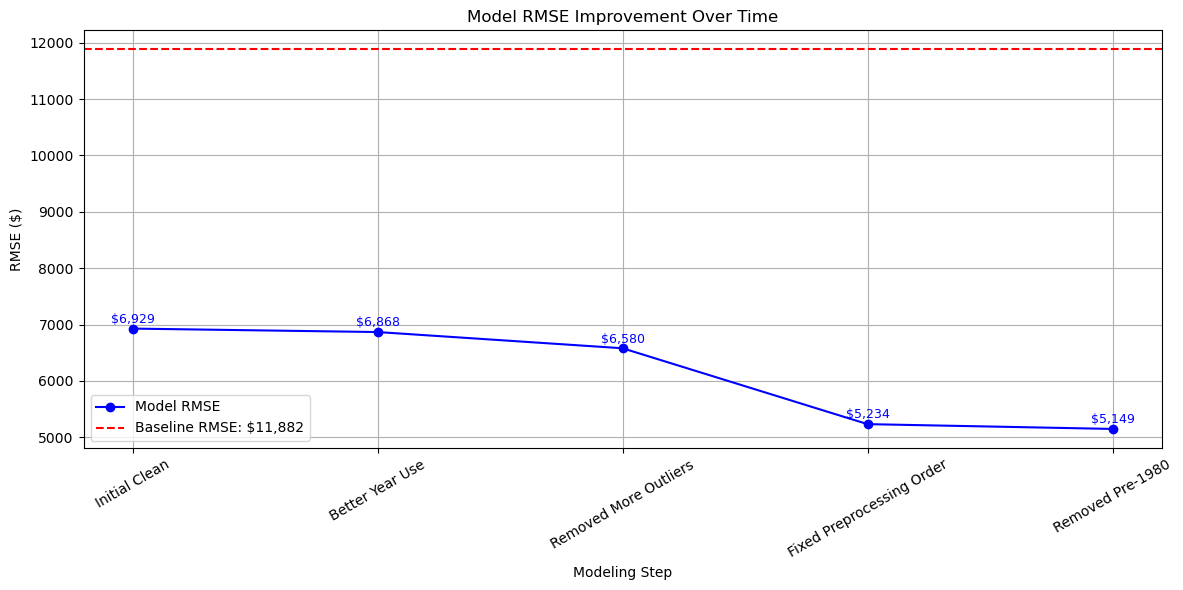

In [215]:


# Data
labels = [
    'Initial Clean',
    'Better Year Use',
    'Removed More Outliers',
    'Fixed Preprocessing Order',
    'Removed Pre-1980'
]
rmse_values = [6929.01, 6867.73, 6580.09, 5234.41, 5149.4]
baseline_rmse = 11882.19

# Plot
plt.figure(figsize=(12, 6))
plt.plot(labels, rmse_values, marker='o', linestyle='-', color='blue', label='Model RMSE')
plt.axhline(y=baseline_rmse, color='red', linestyle='--', label=f'Baseline RMSE: ${baseline_rmse:,.0f}')

# Add improvement annotations
for i, val in enumerate(rmse_values):
    plt.text(i, val + 100, f"${val:,.0f}", ha='center', fontsize=9, color='blue')

# Format
plt.title('Model RMSE Improvement Over Time')
plt.xlabel('Modeling Step')
plt.ylabel('RMSE ($)')
plt.xticks(rotation=30)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**What this plot shows?**

How each modeling decision helped reduce error while I was evaluating the model.  I went back several times to make changes to the model and dataset.  The changes in the data seemed to have the most effect.  Removing the outliers improved the model by a large percentage.

Started at about $6,929 and reached $5,149 — about a 26% improvement

A clear visual contrast with the baseline RMSE of $11,882

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.